In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
filename = 'covid-data-brazil.xlsx'

In [13]:
data_base = pd.read_excel(filename)
data_base.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
3,BRA,South America,Brazil,2020-02-29,2,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
4,BRA,South America,Brazil,2020-03-01,2,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
5,BRA,South America,Brazil,2020-03-02,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
6,BRA,South America,Brazil,2020-03-03,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
7,BRA,South America,Brazil,2020-03-04,4,2.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
8,BRA,South America,Brazil,2020-03-05,4,0.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
9,BRA,South America,Brazil,2020-03-06,13,9.0,1.714,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


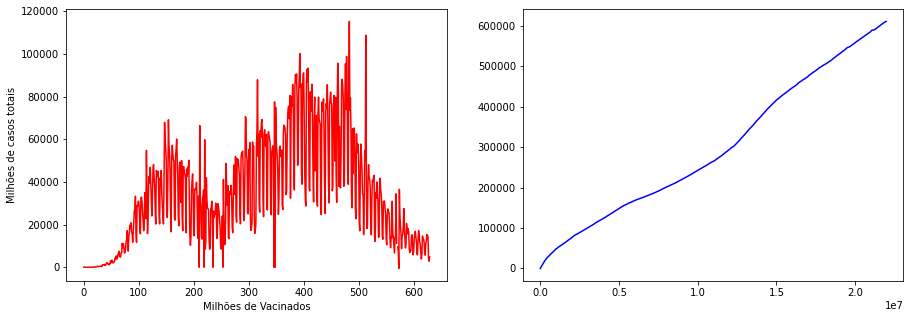

In [14]:
df = data_base.loc[:,['date','total_cases','new_cases','total_deaths','new_deaths','total_vaccinations']]
x = np.arange(0, 630, 1)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(x, df.new_cases, color='red')
plt.xlabel("Milhões de Vacinados")
plt.ylabel("Milhões de casos totais")

plt.subplot(1,2,2)
plt.plot(df.total_cases, df.total_deaths, color='blue')
plt.show()

In [15]:
#Analisando os valores
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
count,6.300000e+02,629.000000,610.000000,610.000000,2.430000e+02
mean,9.681326e+06,34682.953895,276723.667213,1002.422951,9.611344e+07
std,7.688276e+06,25197.953099,208289.879573,797.824401,8.885162e+07
min,1.000000e+00,-573.000000,1.000000,0.000000,0.000000e+00
25%,2.714327e+06,14318.000000,108023.000000,456.000000,1.466288e+07
50%,7.842115e+06,30830.000000,208771.000000,827.000000,6.824422e+07
75%,1.735514e+07,51603.000000,495426.250000,1271.750000,1.640456e+08
max,2.196568e+07,115228.000000,611478.000000,4249.000000,2.971040e+08


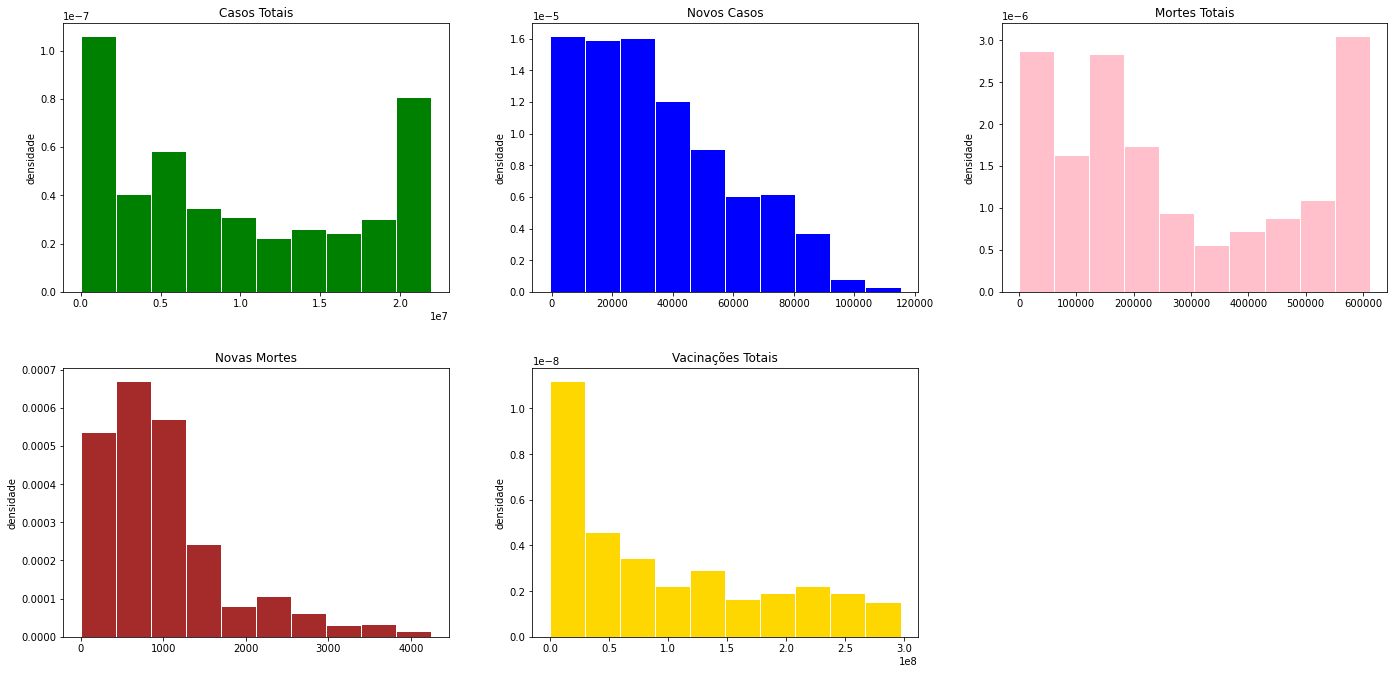

In [34]:
figure = plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.hist(df.total_cases, edgecolor='white', color='green',density=True)
plt.title('Casos Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 2)
plt.hist(df.new_cases, edgecolor='white', color='blue', density=True)
plt.title('Novos Casos')
plt.ylabel('densidade')


plt.subplot(2, 3, 3)
plt.hist(df.total_deaths, edgecolor='white', color='pink', density=True)
plt.title('Mortes Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 4)
plt.hist(df.new_deaths, edgecolor='white', color='brown', density=True)
plt.title('Novas Mortes')
plt.ylabel('densidade')


plt.subplot(2, 3, 5)
plt.hist(df.total_vaccinations, edgecolor='white', color='gold', density=True)
plt.title('Vacinações Totais')
plt.ylabel('densidade')

figure.tight_layout(pad=3.0)
plt.show()

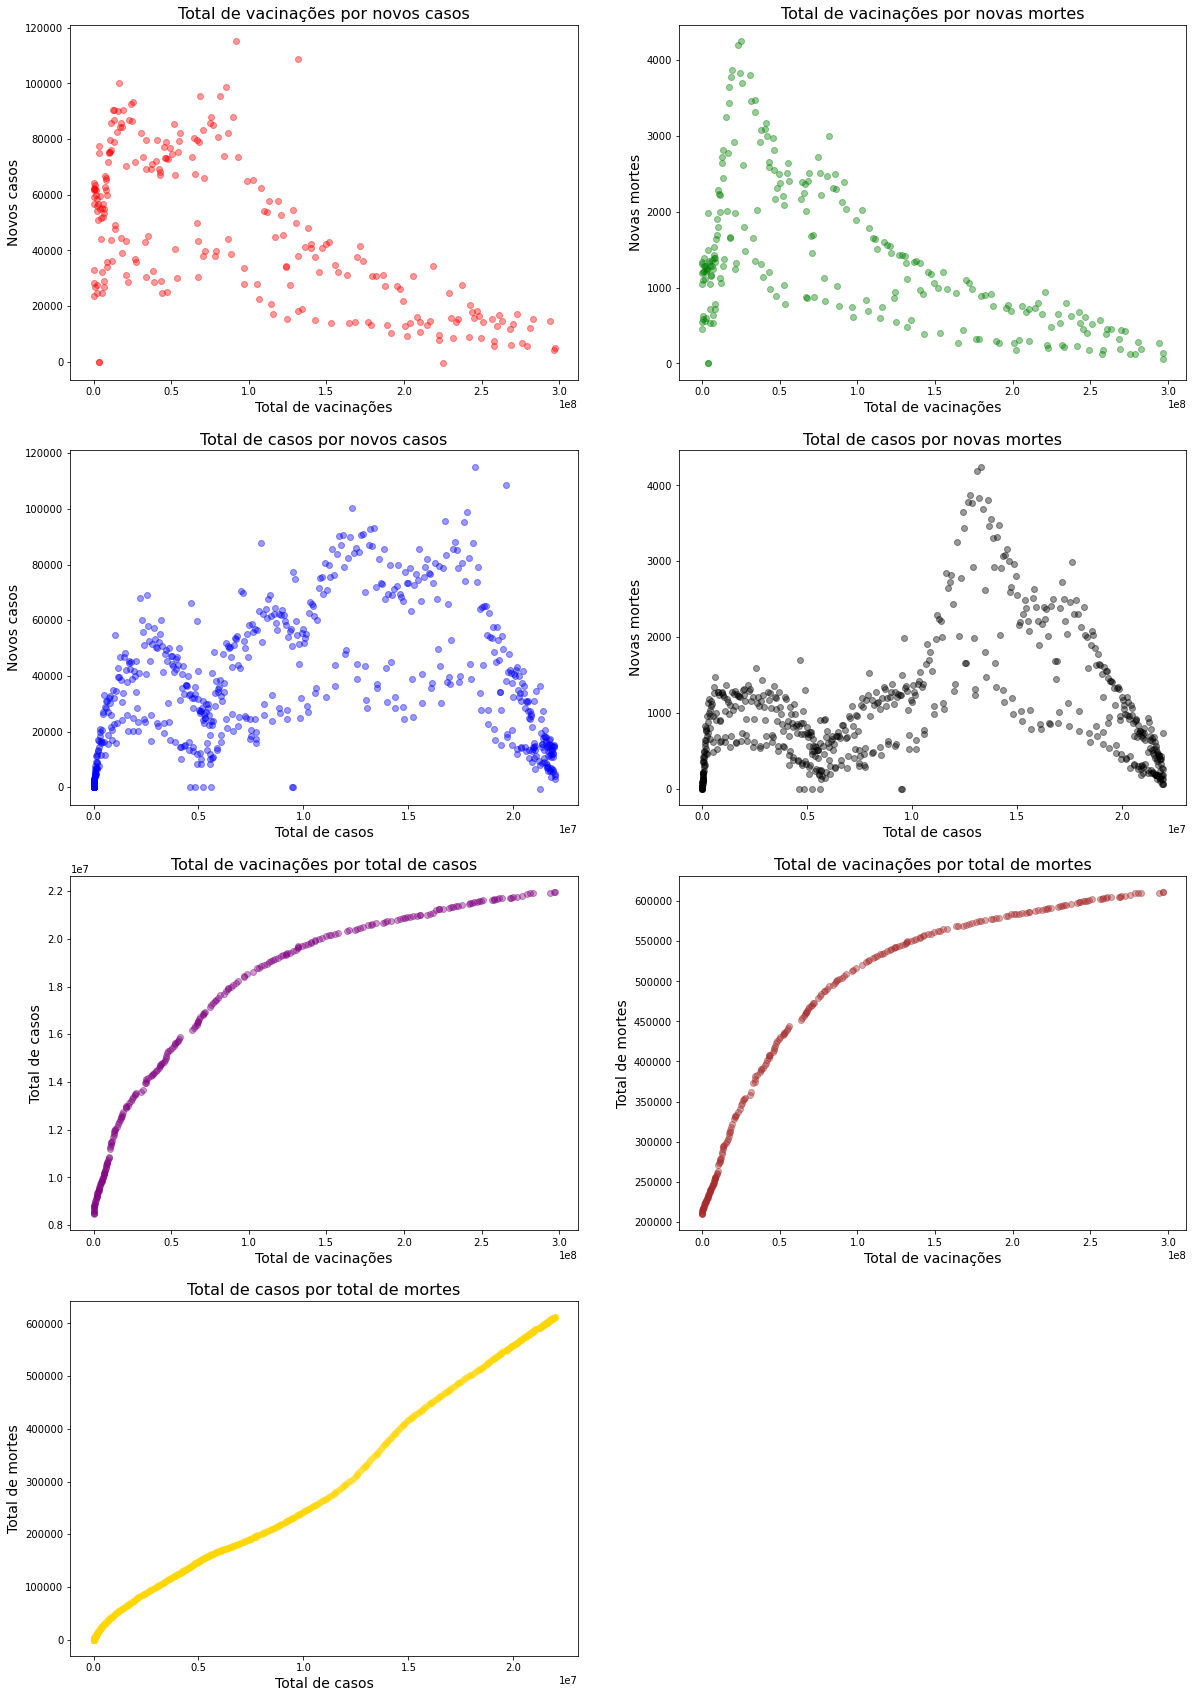

In [37]:
figure = plt.figure(figsize=(20, 30))

plt.subplot(4, 2, 1)
plt.scatter(df.total_vaccinations, df.new_cases, c='red', alpha=0.4)
plt.title('Total de vacinações por novos casos', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(4, 2, 2)
plt.scatter(df.total_vaccinations, df.new_deaths, c='green', alpha=0.4)
plt.title('Total de vacinações por novas mortes', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Novas mortes', fontsize=14)

plt.subplot(4, 2, 3)
plt.scatter(df.total_cases, df.new_cases, c='blue', alpha=0.4)
plt.title('Total de casos por novos casos', fontsize=16)
plt.xlabel('Total de casos', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(4, 2, 4)
plt.scatter(df.total_cases, df.new_deaths, c='black', alpha=0.4)
plt.title('Total de casos por novas mortes', fontsize=16)
plt.xlabel('Total de casos', fontsize=14)
plt.ylabel('Novas mortes', fontsize=14)

plt.subplot(4, 2, 5)
plt.scatter(df.total_vaccinations, df.total_cases, c='purple', alpha=0.4)
plt.title('Total de vacinações por total de casos', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Total de casos', fontsize=14)

plt.subplot(4, 2, 6)
plt.scatter(df.total_vaccinations, df.total_deaths, c='brown', alpha=0.4)
plt.title('Total de vacinações por total de mortes', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Total de mortes', fontsize=14)

plt.subplot(4, 2, 7)
plt.scatter(df.total_cases, df.total_deaths, c='gold', alpha=0.4)
plt.title('Total de casos por total de mortes', fontsize=16)
plt.xlabel('Total de casos', fontsize=14)
plt.ylabel('Total de mortes', fontsize=14)
plt.show()
